In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import os
import time
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from collections import OrderedDict
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from torchvision import datasets
from torchvision import transforms

In [2]:
data_path ='../data-unversioned/p1ch7/'
cifar10 = datasets.CIFAR10(data_path, train=True, download=True)
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True)

Files already downloaded and verified
Files already downloaded and verified


In [3]:
cifar10 = datasets.CIFAR10(data_path, train=True, download=False,
                                      transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.4915, .4823, .4468), (.2470, .2435, .2616))]))
cifar10_val = datasets.CIFAR10(data_path, train=False, download=False,
                                      transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.4915, .4823, .4468), (.2470, .2435, .2616))]))

In [4]:
class Net1(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3,16,kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16,8,kernel_size=3, padding=1)
        self.fc1 = nn.Linear(8*8*8,32)
        self.fc2 = nn.Linear(32,10)
    
    def forward(self, x):
        out = F.max_pool2d(torch.tanh(self.conv1(x)),2)
        out = F.max_pool2d(torch.tanh(self.conv2(out)),2)
        out = out.view(-1, 8*8*8)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        
        return out
    
class Net2(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3,16,kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16,8,kernel_size=3, padding=1)
        self.fc1 = nn.Linear(8*8*8,32)
        self.fc2 = nn.Linear(32,32)
        self.conv3 = nn.Conv2d(3,16,kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(16,8,kernel_size=3, padding=1)
        self.fc3 = nn.Linear(8*8*8,32)
        self.fc4 = nn.Linear(32,10)    
    def forward(self, x):
        out = F.max_pool2d(torch.tanh(self.conv1(x)),2)
        out = F.max_pool2d(torch.tanh(self.conv2(out)),2)
        out = out.view(-1, 8*8*8)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        out = F.max_pool2d(torch.tanh(self.conv3(x)),2)
        out = F.max_pool2d(torch.tanh(self.conv4(out)),2)
        out = out.view(-1, 8*8*8)
        out = torch.tanh(self.fc3(out))
        out = self.fc4(out)
        return out

In [5]:
# Part 2a.
train_loader = torch.utils.data.DataLoader(cifar10, batch_size=64, shuffle=True)

model = Net1()

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.CrossEntropyLoss()

epoch_history = []
loss_history = []
time1 = time.time()
n_epochs=300
for epoch in range(n_epochs):
    for imgs, label in train_loader:
        outputs = model(imgs)
        loss = loss_fn(outputs, label)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    epoch_history.append(epoch)
    loss_history.append(float(loss))
    
    if epoch % 20 == 0:
        print("Epoch: %d, Loss: %f" % (epoch, float(loss)))
        
stop_time = time.time()
time_elapsed = stop_time - time1

print("Total Training Time:", round(time_elapsed,2))

Epoch: 0, Loss: 1.967730
Epoch: 20, Loss: 0.569299
Epoch: 40, Loss: 1.063845
Epoch: 60, Loss: 1.312503
Epoch: 80, Loss: 0.664519
Epoch: 100, Loss: 0.582956
Epoch: 120, Loss: 0.830058
Epoch: 140, Loss: 1.038981
Epoch: 160, Loss: 0.642910
Epoch: 180, Loss: 1.050573
Epoch: 200, Loss: 0.775907
Epoch: 220, Loss: 0.600408
Epoch: 240, Loss: 0.477046
Epoch: 260, Loss: 0.860962
Epoch: 280, Loss: 0.770112
Total Training Time: 6325.7


In [6]:
val_loader = torch.utils.data.DataLoader(cifar10_val, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        outputs = model(imgs)
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted==labels).sum())
        
print("Validation Accuracy:", correct/total)

Validation Accuracy: 0.6203


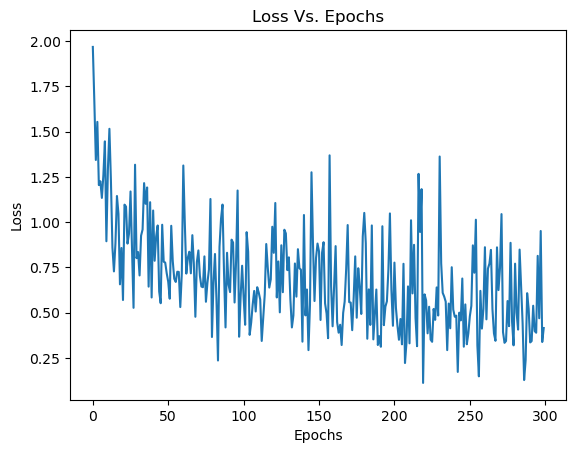

In [7]:
plt.plot(epoch_history, loss_history)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Vs. Epochs")
plt.show()

In [8]:
# Part 2b.
train_loader = torch.utils.data.DataLoader(cifar10, batch_size=64, shuffle=True)

model = Net2()

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.CrossEntropyLoss()

epoch_history = []
loss_history = []
time1 = time.time()
n_epochs=300
for epoch in range(n_epochs):
    for imgs, label in train_loader:
        outputs = model(imgs)
        loss = loss_fn(outputs, label)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    epoch_history.append(epoch)
    loss_history.append(float(loss))
    
    if epoch % 20 == 0:
        print("Epoch: %d, Loss: %f" % (epoch, float(loss)))
        
stop_time = time.time()
time_elapsed = stop_time - time1

print("Total Training Time:", round(time_elapsed,2))

Epoch: 0, Loss: 1.860281
Epoch: 20, Loss: 0.899308
Epoch: 40, Loss: 0.653924
Epoch: 60, Loss: 1.404560
Epoch: 80, Loss: 0.948768
Epoch: 100, Loss: 1.181556
Epoch: 120, Loss: 0.607347
Epoch: 140, Loss: 0.715828
Epoch: 160, Loss: 0.605316
Epoch: 180, Loss: 0.374241
Epoch: 200, Loss: 0.440882
Epoch: 220, Loss: 0.308621
Epoch: 240, Loss: 0.438656
Epoch: 260, Loss: 0.509781
Epoch: 280, Loss: 1.082942
Total Training Time: 8196.8


In [9]:
val_loader = torch.utils.data.DataLoader(cifar10_val, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        outputs = model(imgs)
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted==labels).sum())
        
print("Validation Accuracy:", correct/total)

Validation Accuracy: 0.5955


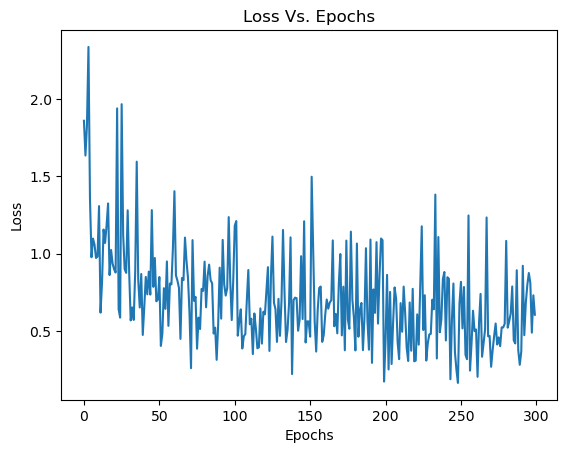

In [10]:
plt.plot(epoch_history, loss_history)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Vs. Epochs")
plt.show()